# Deadly Visualizations!!!

![Image](../images/viz_types_portada.png)

## Setup

First we need to create a basic setup which includes:

- Importing the libraries.

- Reading the dataset file (source [Instituto Nacional de Estadística](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout)).

- Create a couple of columns and tables for the analysis.

__NOTE:__ some functions were already created in order to help you go through the challenge. However, feel free to perform any code you might need.

In [1]:
# imports

import sys
import re
sys.path.insert(0, "../modules")

import numpy as np
import pandas as pd

import plotly.express as px
#%pip install cufflinks
import cufflinks as cf
cf.go_offline()

import module as mod     # functions are include in module.py

In [2]:
# read dataset

deaths = pd.read_csv('../data/7947.csv', sep=';', thousands='.')

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [3]:
deaths

,Causa de muerte,Sexo,Edad,Periodo,Total
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2014,395830
...,...,...,...,...,...
301153,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1984,0
301154,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1983,0
301155,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1982,0
301156,102 Otras causas externas y sus efectos tardíos,Mujeres,95 y más años,1981,0


In [4]:
# add some columns...you'll need them later

deaths['cause_code'] = deaths['Causa de muerte'].apply(mod.cause_code)
deaths['cause_group'] = deaths['Causa de muerte'].apply(mod.cause_types)
deaths['cause_name'] = deaths['Causa de muerte'].apply(mod.cause_name)

deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
 5   cause_code       301158 non-null  object
 6   cause_group      301158 non-null  object
 7   cause_name       301158 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.4+ MB


In [5]:
multiple_filtrado = deaths[(deaths['Sexo'] == 'Total')]

multiple_filtrado = mod.nrow_filter(multiple_filtrado, 'Edad', ['Todas las edades'])

multiple_filtrado = mod.nrow_filter(multiple_filtrado, 'Causa de muerte', ['001-102  I-XXII.Todas las causas'])

multiple_filtrado


,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,053-061 IX.Enfermedades del sistema circulatorio,Total,De 85 a 89 años,2017,30047,053-061,Multiple causes,IX.Enfermedades del sistema circulatorio
1,053-061 IX.Enfermedades del sistema circulatorio,Total,De 85 a 89 años,2015,29939,053-061,Multiple causes,IX.Enfermedades del sistema circulatorio
2,053-061 IX.Enfermedades del sistema circulatorio,Total,De 85 a 89 años,2012,29567,053-061,Multiple causes,IX.Enfermedades del sistema circulatorio
3,053-061 IX.Enfermedades del sistema circulatorio,Total,De 85 a 89 años,2018,29222,053-061,Multiple causes,IX.Enfermedades del sistema circulatorio
4,053-061 IX.Enfermedades del sistema circulatorio,Total,De 80 a 84 años,1991,28858,053-061,Multiple causes,IX.Enfermedades del sistema circulatorio
...,...,...,...,...,...,...,...,...
94999,053 Enfermedades cardíacas reumáticas crónicas,Total,De 5 a 9 años,1990,0,053,Single cause,Enfermedades cardíacas reumáticas crónicas
95000,053 Enfermedades cardíacas reumáticas crónicas,Total,De 5 a 9 años,1991,0,053,Single cause,Enfermedades cardíacas reumáticas crónicas
95001,053 Enfermedades cardíacas reumáticas crónicas,Total,De 5 a 9 años,1992,0,053,Single cause,Enfermedades cardíacas reumáticas crónicas
95002,053 Enfermedades cardíacas reumáticas crónicas,Total,De 5 a 9 años,1993,0,053,Single cause,Enfermedades cardíacas reumáticas crónicas


In [6]:
total_muertos_por_causa = multiple_filtrado.groupby('Causa de muerte')['Total'].sum()

total_muertos_por_causa


Causa de muerte
001  Enfermedades infecciosas intestinales                 17022
001-008  I.Enfermedades infecciosas y parasitarias        246243
002  Tuberculosis y sus efectos tardíos                    26726
003  Enfermedad meningocócica                               3985
004  Septicemia                                            94841
                                                           ...  
098  Suicidio y lesiones autoinfligidas                   120871
099  Agresiones (homicidio)                                14230
100  Eventos de intención no determinada                    5795
101  Complicaciones de la atención médica y quirúrgica     14556
102  Otras causas externas y sus efectos tardíos            1423
Name: Total, Length: 116, dtype: int64

In [7]:
resultado = multiple_filtrado.groupby(['Causa de muerte','Edad']).agg({'Total': 'sum', 'Edad': 'max'})
resultado

Total  \
Causa de muerte                                  Edad                       
001  Enfermedades infecciosas intestinales       95 y más años       1366   
                                                 De 1 a 4 años        111   
                                                 De 10 a 14 años       18   
                                                 De 15 a 19 años       27   
                                                 De 20 a 24 años       27   
...                                                                   ...   
102  Otras causas externas y sus efectos tardíos De 75 a 79 años      131   
                                                 De 80 a 84 años      134   
                                                 De 85 a 89 años      110   
                                                 De 90 a 94 años       64   
                                                 Menos de 1 año         0   

                                                                                 Edad  
Causa de muerte                                  Edad                                  
001  Enfermedades infecciosas intestinales       95 y más años          95 y más años  
                                                 De 1 a 4 años          De 1 a 4 años  
                                                 De 10 a 14 años    De 10 a 14 años    
                                                 De 15 a 19 años    De 15 a 19 años    
                                                 De 20 a 24 años      De 20 a 24 años  
...                                                                               ...  
102  Otras causas externas y sus efectos tardíos De 75 a 79 años    De 75 a 79 años    
                                                 De 80 a 84 años    De 80 a 84 años    
                                                 De 85 a 89 años    De 85 a 89 años    
                                                 De 90 a 94 años    De 90 a 94 años    
                                                 Menos de 1 año        Menos de 1 año  

[2436 rows x 2 columns]

In [8]:
maximos_por_edad = resultado['Total'].groupby(resultado['Edad']).max()

maximos_por_edad

Edad
95 y más años        248543
De 1 a 4 años          6155
De 10 a 14 años        6630
De 15 a 19 años       29288
De 20 a 24 años       46022
De 25 a 29 años       43410
De 30 a 34 años       39670
De 35 a 39 años       37072
De 40 a 44 años       60181
De 45 a 49 años      107377
De 5 a 9 años          5312
De 50 a 54 años      174323
De 55 a 59 años      255068
De 60 a 64 años      343489
De 65 a 69 años      434004
De 70 a 74 años      512681
De 75 a 79 años      731283
De 80 a 84 años      986931
De 85 a 89 años      986239
De 90 a 94 años      632484
Menos de 1 año        46094
Name: Total, dtype: int64

In [9]:
resultado_ordenado = resultado.sort_values(by='Total', ascending=False)
resultado_ordenado = resultado_ordenado[resultado_ordenado['Edad'] == 'De 75 a 79 años  ']
resultado_ordenado

,,Total,Edad
Causa de muerte,Edad,,
053-061 IX.Enfermedades del sistema circulatorio,De 75 a 79 años,731283,De 75 a 79 años
009-041 II.Tumores,De 75 a 79 años,553736,De 75 a 79 años
059 Enfermedades cerebrovasculares,De 75 a 79 años,242012,De 75 a 79 años
062-067 X.Enfermedades del sistema respiratorio,De 75 a 79 años,223245,De 75 a 79 años
055 Infarto agudo de miocardio,De 75 a 79 años,140812,De 75 a 79 años
...,...,...,...
"048 Trastornos mentales debidos al uso de drogas (drogodependencia, toxicomanía)",De 75 a 79 años,21,De 75 a 79 años
"007 VIH+ (portador, evidencias de laboratorio del VIH, ...)",De 75 a 79 años,4,De 75 a 79 años
082 XVI.Afecciones originadas en el periodo perinatal,De 75 a 79 años,3,De 75 a 79 años


In [10]:
max_muertes = resultado_ordenado.iloc[0]
max_muertes

Total               731283
Edad     De 75 a 79 años  
Name: (053-061 IX.Enfermedades del sistema circulatorio, De 75 a 79 años  ), dtype: object

In [11]:
total_muertos_por_causa.sum()

27746778

In [12]:
resultado['Total'].sum()

27746778

In [13]:
valores_edades = multiple_filtrado['Edad'].unique()
print(valores_edades)

['De 85 a 89 años  ' 'De 80 a 84 años  ' 'De 90 a 94 años  '
 'De 75 a 79 años  ' 'De 70 a 74 años  ' 'De 65 a 69 años' '95 y más años'
 'De 60 a 64 años' 'De 55 a 59 años' 'De 50 a 54 años' 'Menos de 1 año'
 'De 45 a 49 años' 'De 20 a 24 años' 'De 30 a 34 años' 'De 25 a 29 años'
 'De 40 a 44 años' 'De 15 a 19 años  ' 'De 35 a 39 años' 'De 5 a 9 años'
 'De 1 a 4 años' 'De 10 a 14 años  ']


## Lets make some transformations

Eventhough the dataset is pretty clean, the information is completely denormalized as you could see. For that matter a collection of methods (functions) are available in order to generate the tables you might need:

- `row_filter(df, cat_var, cat_values)` => Filter rows by any value or group of values in a categorical variable.

- `nrow_filter(df, cat_var, cat_values)` => The same but backwards. 

- `groupby_sum(df, group_vars, agg_var='Total', sort_var='Total')` => Add deaths by a certain variable.

- `pivot_table(df, col, x_axis, value='Total')`=> Make some pivot tables, you might need them...

__NOTE:__ be aware that the filtering methods can perform a filter at a time. Feel free to perform the filter you need in any way you want or feel confortable with.

In [14]:
# Example 1

dataset = mod.row_filter(deaths, 'Sexo', ['Total'])
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset.head()


,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2012,402950,001-102,Multiple causes,I-XXII.Todas las causas


In [15]:
# Example 2

group = ['cause_code','Periodo']
group = mod.groupby_sum(deaths, group)
dataset.head()


,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
0,001-102 I-XXII.Todas las causas,Total,Todas las edades,2018,427721,001-102,Multiple causes,I-XXII.Todas las causas
1,001-102 I-XXII.Todas las causas,Total,Todas las edades,2017,424523,001-102,Multiple causes,I-XXII.Todas las causas
2,001-102 I-XXII.Todas las causas,Total,Todas las edades,2015,422568,001-102,Multiple causes,I-XXII.Todas las causas
3,001-102 I-XXII.Todas las causas,Total,Todas las edades,2016,410611,001-102,Multiple causes,I-XXII.Todas las causas
4,001-102 I-XXII.Todas las causas,Total,Todas las edades,2012,402950,001-102,Multiple causes,I-XXII.Todas las causas


In [16]:
# Example 3

dataset = mod.pivot_table(group, 'cause_code', 'Periodo')
dataset.head()


cause_code,Periodo,001,001-008,001-102,002,003,004,005,006,007,...,093,094,095,096,097,098,099,100,101,102
0,1980,1620,15768,1157376,5904,2008,3448,436,0,0,...,4956,1432,184,692,16748,6608,1496,28,968,96
1,1981,1404,15124,1173544,6332,1656,3344,348,0,0,...,4700,1200,156,1396,17472,6872,1284,336,908,208
2,1982,1308,13488,1146620,5352,1240,3104,316,0,0,...,4864,956,200,1000,18616,7404,1228,440,1132,52
3,1983,1212,13100,1210276,5152,1072,3152,336,0,0,...,4788,1464,148,884,18392,8724,1560,1276,1500,56
4,1984,1228,12928,1197636,4564,964,3704,424,0,0,...,4716,1244,164,1020,14696,9972,1812,1144,1636,76


## ...and finally, show me some insights with Plotly!!!

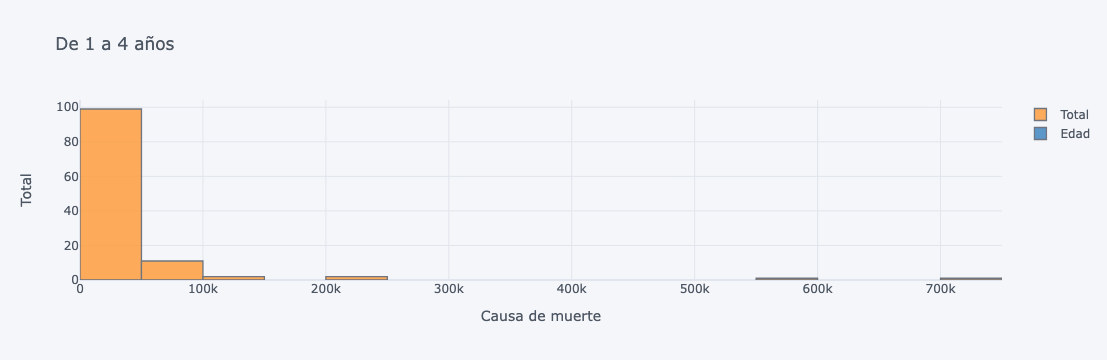

In [17]:
# Cufflinks histogram

resultado_ordenado.iplot(kind='hist',
                     title='De 1 a 4 años',
                     yTitle='Total',
                     xTitle='Causa de muerte')


In [20]:
resultado_ordenado.columns.tolist()
group.columns.tolist()

['cause_code', 'Periodo', 'Total']

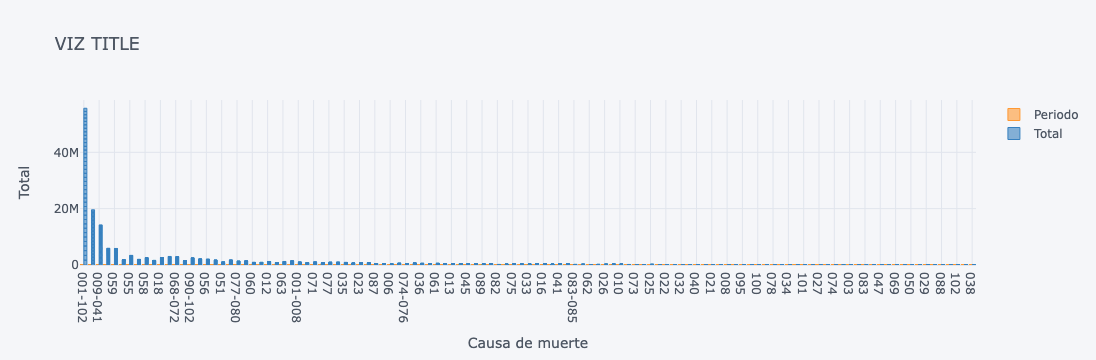

In [23]:
# Cufflinks bar plot

group.iplot(kind='bar',
                  x='cause_code',
                  xTitle='Causa de muerte',
                  yTitle='Total',
                  title='VIZ TITLE')


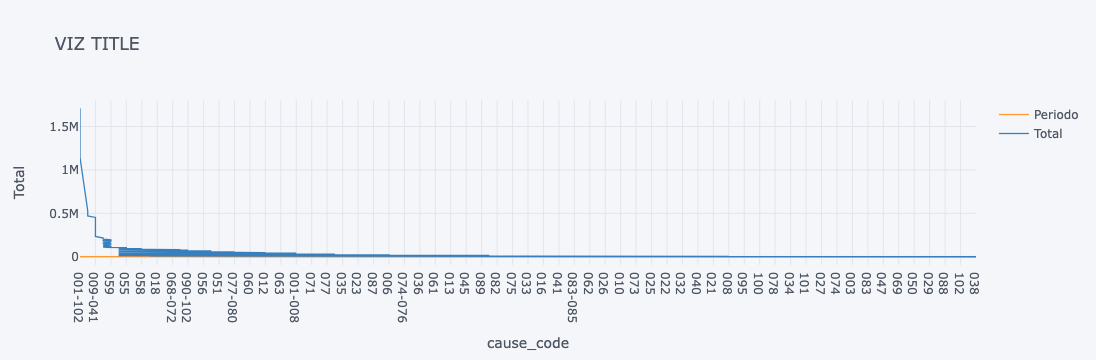

In [24]:
# Cufflinks line plot

group.iplot(kind='line',
                   x='cause_code',
                   xTitle='cause_code',
                   yTitle='Total',
                   title='VIZ TITLE')
